<a href="https://colab.research.google.com/github/NGUYENGREENY/Project---Street-View-House-Numbers/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classifier for the SVHN dataset
## Overview

In this notebook, I will create a neural network that classifies real-world images digits. I will use concepts from throughout this course in building, training, testing, validating and saving my Tensorflow classifier model.

## Let's get started!

We'll start by running some imports, and loading the dataset.

In [ ]:
import tensorflow as tf
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
import random


For this project, I will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load the dataset from your Drive folder

train = loadmat('/content/gdrive/MyDrive/Street-View-House-Numbers-master/train_32x32.mat')
test = loadmat('/content/gdrive/MyDrive/Street-View-House-Numbers-master/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries already loaded.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel.
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [ ]:
# Loading the dataset

x_train = train['X']
x_test = test['X']
y_train = train['y']
y_test = test['y']

In [ ]:
# analysing the dimensions of the input
x_train.shape, x_test.shape

((32, 32, 3, 73257), (32, 32, 3, 26032))

In [ ]:
# changing dimensions from (a, b, c, num_examples) to (num_examples, a, b, c)

x_train = np.moveaxis(x_train, -1, 0)
x_test = np.moveaxis(x_test, -1, 0)

In [ ]:
# checking if dimensions have actually changed

x_train.shape, x_test.shape

((73257, 32, 32, 3), (26032, 32, 32, 3))

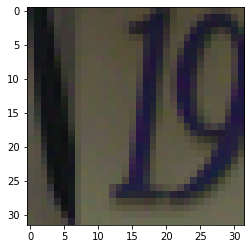

[1]


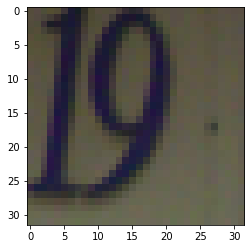

[9]


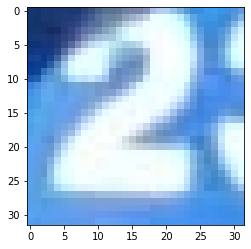

[2]


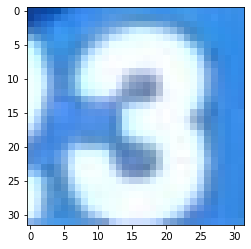

[3]


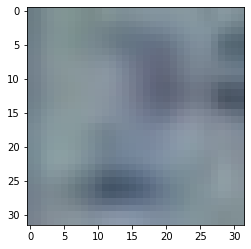

[2]


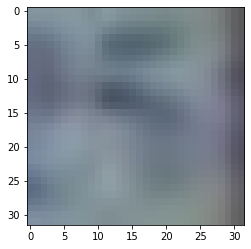

[5]


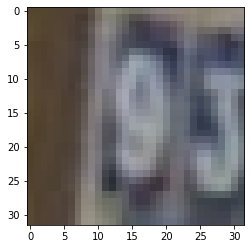

[9]


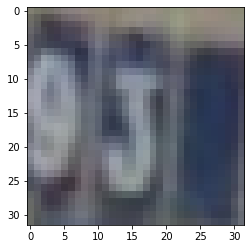

[3]


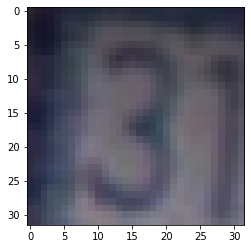

[3]


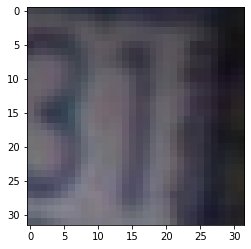

[1]


In [ ]:
# plotting some sample images

for i in range(10):
    plt.imshow(x_train[i, :, :, :])
    plt.show()
    print(y_train[i])

In [ ]:
# making changes to the images

x_train_gray = np.mean(x_train, 3).reshape(73257, 32, 32, 1) / 255.
x_test_gray = np.mean(x_test, 3).reshape(26032, 32, 32, 1) / 255.
x_train_plot = np.mean(x_train, 3)

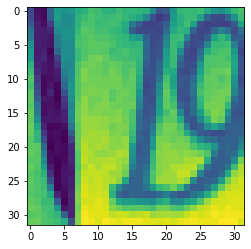

[1]


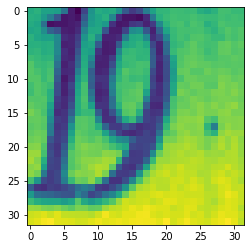

[9]


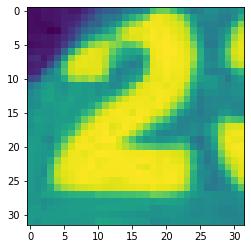

[2]


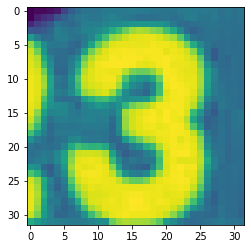

[3]


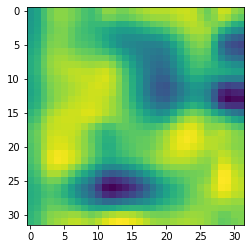

[2]


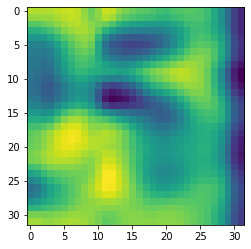

[5]


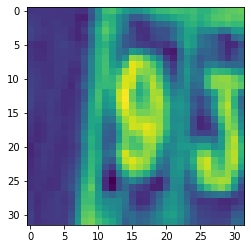

[9]


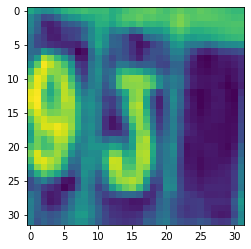

[3]


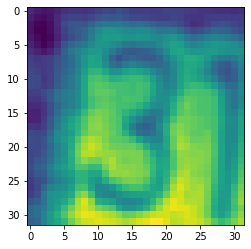

[3]


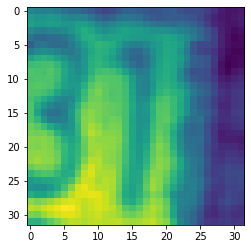

[1]


In [ ]:
# plotting the training images

for i in range(10):
    plt.imshow(x_train_plot[i, :, :,])
    plt.show()
    print(y_train[i])

In [ ]:
# was having trouble in MLP NN classifier, so converting to one-hot labels

x_train[0].shape

(32, 32, 3)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder().fit(y_train)
y_train_oh = enc.transform(y_train).toarray()
y_test_oh = enc.transform(y_test).toarray()

In [ ]:
y_test_oh[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

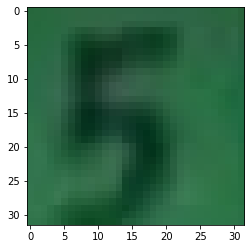

In [ ]:

plt.imshow(x_test[0])


## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API.
* Print out the model summary
* Compile and train the model, making use of both training and validation sets during the training run. 
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
model_seq = Sequential([
                        Flatten(input_shape=x_train[0].shape),
                        Dense(128, activation='relu'),
                        Dense(256, activation='relu'),
                        BatchNormalization(),
                        Dense(256, activation='relu'),
                        Dropout(0.5),
                        Dense(512, activation='relu'),
                        Dense(10, activation='softmax')

])

model_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1

In [ ]:
model_seq.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(filepath='sequential',
                             save_best_only=True,
                             save_weights_only=True,
                             monitor='val_loss',
                             mode='min',
                             verbose=1)

early_stop = EarlyStopping(patience=5, monitor='loss')

In [ ]:
history = model_seq.fit(x_train, y_train_oh, epochs=30,
                        validation_data=(x_test, y_test_oh),
                        batch_size=128,
                        callbacks=[checkpoint, early_stop])

Epoch 1/30
573/573 [==============================] - 7s 7ms/step - loss: 1.6162 - accuracy: 0.4478 - val_loss: 2.1982 - val_accuracy: 0.3109

Epoch 00001: val_loss improved from inf to 2.19817, saving model to sequential
Epoch 2/30
573/573 [==============================] - 4s 6ms/step - loss: 1.1694 - accuracy: 0.6327 - val_loss: 1.9972 - val_accuracy: 0.4394

Epoch 00002: val_loss improved from 2.19817 to 1.99724, saving model to sequential
Epoch 3/30
573/573 [==============================] - 4s 6ms/step - loss: 1.0721 - accuracy: 0.6670 - val_loss: 1.2712 - val_accuracy: 0.6062

Epoch 00003: val_loss improved from 1.99724 to 1.27118, saving model to sequential
Epoch 4/30
573/573 [==============================] - 4s 6ms/step - loss: 1.0128 - accuracy: 0.6844 - val_loss: 1.6219 - val_accuracy: 0.4787

Epoch 00004: val_loss did not improve from 1.27118
Epoch 5/30
573/573 [==============================] - 4s 6ms/step - loss: 0.9573 - accuracy: 0.7021 - val_loss: 1.0467 - val_accurac

Text(0.5, 1.0, 'Loss')

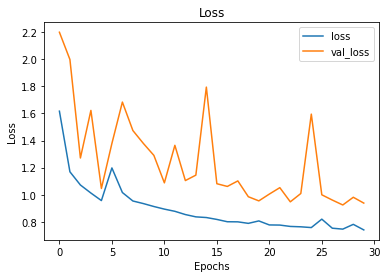

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.title('Loss')

Text(0.5, 1.0, 'Accuracy')

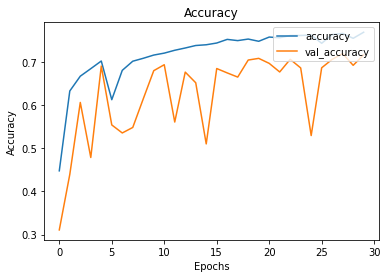

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')
plt.title('Accuracy')

In [ ]:
model_seq.evaluate(x_test, y_test_oh, verbose=2)

814/814 - 2s - loss: 0.9387 - accuracy: 0.7163


[0.938668429851532, 0.7163491249084473]

## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API.
* Compile and train the model, making use of both training and validation sets during the training run.
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
model_cnn = Sequential([
                        Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=x_train[0].shape),
                        MaxPooling2D((3, 3,)),
                        Conv2D(32, (3, 3), padding='same', activation='relu'),
                        MaxPooling2D((3, 3,)),
                        BatchNormalization(),
                        Conv2D(64, (3, 3), padding='same', activation='relu'),
                        MaxPooling2D((3, 3,)),
                        Dropout(0.5),
                        Flatten(),
                        Dense(64, activation='relu'),
                        Dropout(0.5),
                        Dense(10, activation='softmax')
])

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 3, 32)          128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)         

In [ ]:
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
checkpoint_cnn = ModelCheckpoint(filepath='CNN', save_best_only=True,
                                 save_weights_only=True,
                                 save_freq=5000,
                                 monitor='val_acc',
                                 mode='max')
early_stop_cnn = EarlyStopping(monitor='loss', patience=7, verbose=1)

In [ ]:
history = model_cnn.fit(x_train,  y_train_oh,
                        callbacks=[checkpoint_cnn, early_stop_cnn],
                        batch_size=128, validation_data=(x_test, y_test_oh),
                        epochs=30)
_

Epoch 1/30
573/573 [==============================] - 36s 12ms/step - loss: 1.9659 - accuracy: 0.3075 - val_loss: 1.3303 - val_accuracy: 0.5571
Epoch 2/30
573/573 [==============================] - 6s 10ms/step - loss: 1.2205 - accuracy: 0.5966 - val_loss: 0.9597 - val_accuracy: 0.6882
Epoch 3/30
573/573 [==============================] - 6s 10ms/step - loss: 0.9386 - accuracy: 0.7051 - val_loss: 0.7667 - val_accuracy: 0.7675
Epoch 4/30
573/573 [==============================] - 6s 11ms/step - loss: 0.8255 - accuracy: 0.7480 - val_loss: 0.7308 - val_accuracy: 0.7738
Epoch 5/30
573/573 [==============================] - 6s 10ms/step - loss: 0.7625 - accuracy: 0.7696 - val_loss: 0.7294 - val_accuracy: 0.7792
Epoch 6/30
573/573 [==============================] - 6s 11ms/step - loss: 0.7203 - accuracy: 0.7861 - val_loss: 0.5840 - val_accuracy: 0.8303
Epoch 7/30
573/573 [==============================] - 6s 10ms/step - loss: 0.6907 - accuracy: 0.7953 - val_loss: 0.5577 - val_accuracy: 0.834

[0.938668429851532, 0.7163491249084473]

Text(0.5, 1.0, 'Loss')

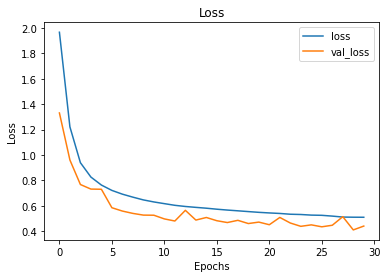

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.title('Loss')

Text(0.5, 1.0, 'Accuracy')

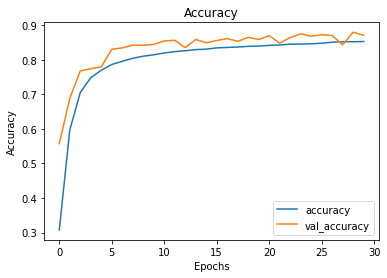

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.title('Accuracy')

In [ ]:
model_cnn.evaluate(x_test, y_test_oh, verbose=2)

814/814 - 2s - loss: 0.4395 - accuracy: 0.8705


[0.43949398398399353, 0.8705055117607117]

## 4. Get model predictions
* Load the best weights for the MLP and CNN models saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [ ]:
model_seq.load_weights('sequential')

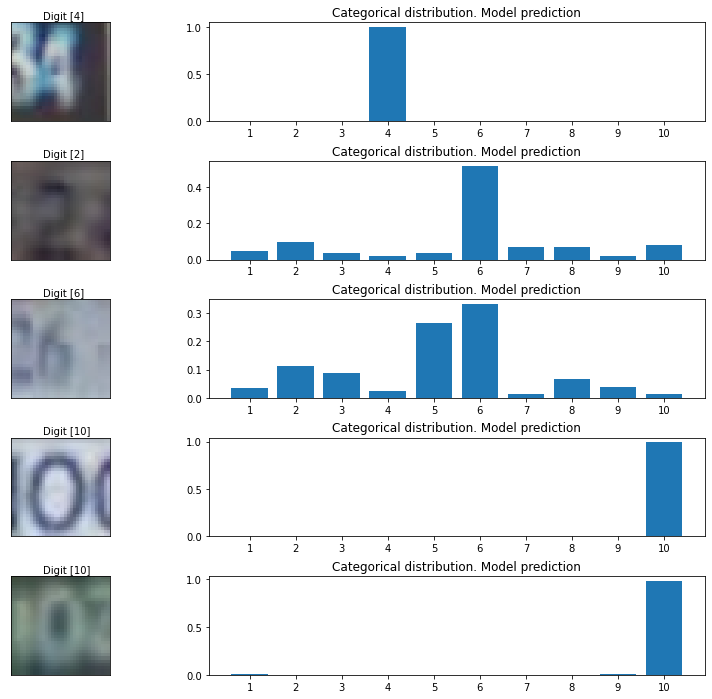

In [ ]:
num_test_images = x_test.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images = x_test[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

predictions = model_seq.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(1,11), prediction)
    axes[i, 1].set_xticks(np.arange(1,11))
    axes[i, 1].set_title("Categorical distribution. Model prediction")
    
plt.show()


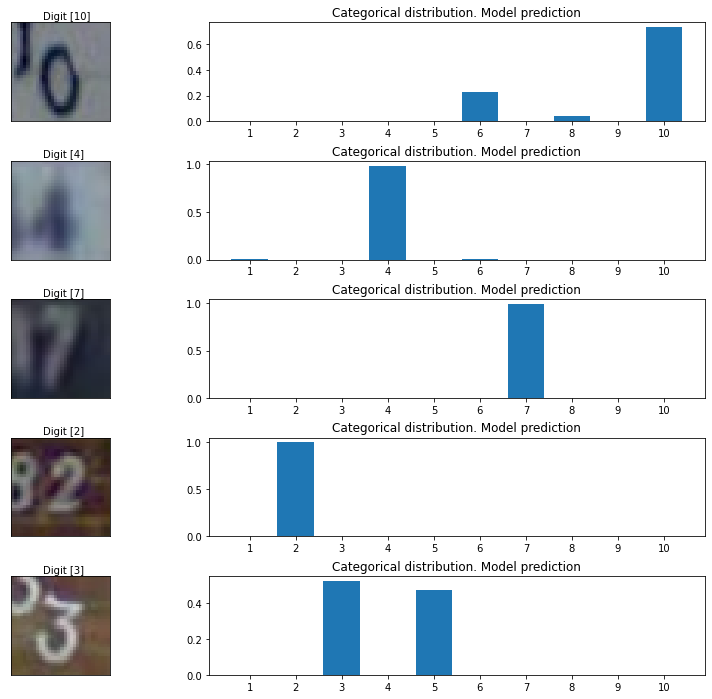

In [ ]:
num_test_images = x_test.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images = x_test[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

predictions = model_cnn.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(1,11), prediction)
    axes[i, 1].set_xticks(np.arange(1,11))
    axes[i, 1].set_title("Categorical distribution. Model prediction")
    
plt.show()
